# Funções estatísticas 

O módulo stats contém uma grande quantidade de distribuições de probabilidade (124 atualmente), e uma biblioteca em constante crescimento de funções estatísticas, incluindo estatística descritiva, distribuições de frequência, correlações, testes, transformações, distâncias, estatística circular, etc. Também há duas classes que facilitam a criação de distribuições customizadas: rv_continuous, para distribuições contínuas, e rv_discrete, para discretas.

## Usando distribuições

Nesta Seção, tomaremos como exemplo a distribuição normal, representada pela classe scipy.stats.norm, que herda todos métodos genéricos da classe rv_continuous. A classe norm representa a forma normal padrão

Para importar a ditribuição normal, fazemos:

In [1]:
from scipy.stats import norm

Para calcular alguns momentos:

In [2]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print('média: {}, variância: {}, assimetria: {}, curtose: {}'.format(mean, var, skew, kurt))

média: 0.0, variância: 1.0, assimetria: 0.0, curtose: 0.0


Como dito acima, essa classe implementa a distribuição normal padrão. Para deslocar ou mudar a escala da distribuição, i.e. informar média e desvio-padrão, pode-se infomar os parâmetros loc e scale, respectivamente. Exemplo:

In [3]:
mean, var = norm.stats(loc=2, scale=0.5, moments='mv')
print('média: {}, variância: {}'.format(mean, var, skew, kurt))

média: 2.0, variância: 0.25


Para calcular a fdp para um número real  x , fazemos:

In [4]:
x = 1
print(norm.pdf(x, loc=2, scale=0.5))

0.10798193302637613


A função pdf também pode ser usada para calcular a fdp para cada elemento de um array:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 1000)
plt.plot(x, norm.pdf(x, loc=2, scale=0.5))
plt.show()

<Figure size 640x480 with 1 Axes>

A função de distribuição acumulada pode ser calculada de maneira muito similar, usando a função cdf:

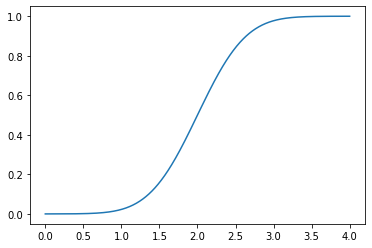

In [7]:
plt.plot(x, norm.cdf(x, loc=2, scale=0.5))
plt.show()

Para construir o intervalo que contém  95%  da distribuição, faz-se:

In [9]:
print(norm.interval(0.95, loc=2, scale=0.5))

(1.020018007729973, 2.979981992270027)


Para construir o intervalo de confiança de  95%  para a média de  100  observações de uma normal  $X∼N(2,0.25)$ , podemos usar a função interval novamente:

In [11]:
print(norm.interval(0.95, loc=2, scale=0.5/100))

(1.9902001800772997, 2.0097998199227)


Para retirar amostras de uma variável  $X∼N(2,0.25)$ , usamos a função rvs (de random variable sample):

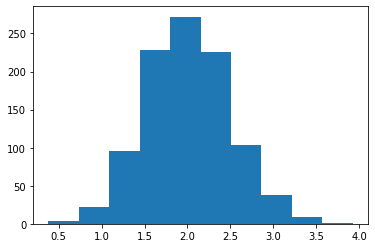

In [13]:
np.random.seed(42)

samples = norm.rvs(loc=2, scale=0.5, size=1000)
plt.hist(samples)
plt.show()

Para obter os percentis de uma variável  $X∼N(2,0.25)$  usamos a função ppf (percent point function):

In [15]:
q1 = norm.ppf(0.25, loc=2, scale=0.5)
q3 = norm.ppf(0.75, loc=2, scale=0.5)

print('primeiro quartil: {}, terceiro quartil: {}'.format(q1, q3))

primeiro quartil: 1.6627551249019592, terceiro quartil: 2.337244875098041


Note que, ao longo desses exemplos, foi necessário informar a média (loc) e o desvio padrão (scale) repetidamente. Para evitar essa repetição de código, é possível criar um objeto norm que armazena a média e o desvio padrão para posterior uso nos demais métodos. Para isso, basta chamar norm em forma de função (construtor).

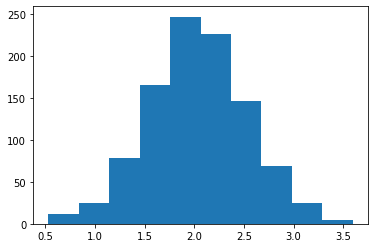

In [16]:
rv = norm(loc=2, scale=0.5)

samples = rv.rvs(size=1000)
plt.hist(samples)
plt.show()

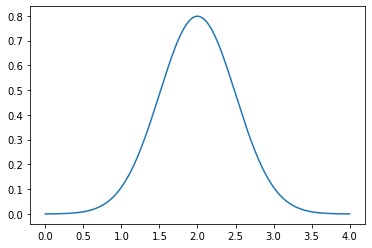

In [17]:
x = np.linspace(0, 4, 1000)
plt.plot(x, rv.pdf(x))
plt.show()

Ao fazer isso, os métodos não aceitarão mais os parâmetros loc e scale:

In [20]:
plt.plot(x, rv.pdf(x, loc=2, scale=0.5))
plt.show()

TypeError: pdf() got an unexpected keyword argument 'loc'

Outras funções úteis incluem expect e fit. A função expect calcula o valor esperado de uma função com respeito à distribuição. Exemplo:

In [21]:
def square(x):
    return x ** 2

expected_x_square = rv.expect(square)
square_expected_x = rv.mean() ** 2
var_calc = expected_x_square - square_expected_x

print('variância 1: {}, variância 2: {}'.format(var_calc, rv.var()))

variância 1: 0.2500000000000009, variância 2: 0.25


A função fit ajusta uma distribuição ao array de dados informado. No caso da distribuição normal, isso significa calcular a média e o desvio padrão dos dados. Exemplo:

In [23]:
np.random.seed(42)
x = norm.rvs(loc=1, scale=3, size=1000)

mean, std = norm.fit(x)
print('média: {}, desvio padrão: {}'.format(mean, std))

média: 1.0579961674669767, desvio padrão: 2.9361786232420632


Apesar de termos usado a distribuição normal como exemplo, todas as funcionalidades que apresentamos também se aplicam às outras distribuições contínuas e discretas, com uma diferença: nas distribuições discretas, a função pdf dá lugar à função pmf (função massa de probabilidade). No entando, seu uso é igual.

## Testes de hipótese

O módulo stats atualmente oferece 32 funções para realizar diferentes testes de hipótese, incluindo testes paramétricos e não-paraétricos para média, mediana e variância e testes de bondade de ajuste e de normalidade. Começaremos cobrindo o teste t de Student bicaudal para a média de uma coleção de observações, i.e.  $H0: x¯=μ0$  e  H1: $x¯≠μ0$ . Esse teste pode ser realizado pela função ttest_1samp, que recebe como parâmetros um array e uma média populacional:

In [24]:
from scipy.stats import ttest_1samp

np.random.seed(42)

x = norm.rvs(loc=5, scale=10, size=1000)
print(
    'Não rejeita a hipótese nula: {}'.format(ttest_1samp(x, 5))
)
print(
    'Rejeita a hipótese nula: {}'.format(ttest_1samp(x, 0))
)

Não rejeita a hipótese nula: Ttest_1sampResult(statistic=0.6243089585093202, pvalue=0.5325672436623019)
Rejeita a hipótese nula: Ttest_1sampResult(statistic=16.77129726247285, pvalue=8.210083235562808e-56)


Os testes t para duas amostras podem ser realizados para amostras independentes ou pareadas por meio das funções ttest_ind e ttest_rel, respectivamente. A função ttest_ind recebe dois arrays e realiza um teste bicaudal para igualdade das duas médias. Exemplo:

In [26]:
from scipy.stats import ttest_ind

np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=5, scale=10, size=30)

print(
    'Não rejeita a hipótese nula: {}'.format(ttest_ind(a, b))
)

Não rejeita a hipótese nula: Ttest_indResult(statistic=-1.2296429533938804, pvalue=0.22252704557384642)


A função ttest_ind assume por padrão que as duas populações têm a mesma variância. Caso deseje-se assumir variâncias diferentes, pode-se atribuir o valor False ao parâmetro equal_var:

In [27]:
np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=0, scale=1, size=30)

print(
    'Rejeita a hipótese nula: {}'.format(ttest_ind(a, b, equal_var=False))
)

Rejeita a hipótese nula: Ttest_indResult(statistic=2.0257732965417956, pvalue=0.048054285617342485)


Caso apenas os valores das médias, desvios e tamanhos amostrais estejam disponíveis (ao invés das amostras em si), pode-se usar a função ttest_ind_from_stats:

In [29]:
from scipy.stats import ttest_ind_from_stats

mean1, std1, nobs1 = 0, 1, 50
mean2, std2, nobs2 = -1, 1, 15

print(
    'Rejeita a hipótese nula: {}'.format(
        ttest_ind_from_stats(
            mean1, std1, nobs1, mean2, std2, nobs2, equal_var=False
        )
    )
)

Rejeita a hipótese nula: Ttest_indResult(statistic=3.396831102433787, pvalue=0.0024703403870314903)


Para realizar testes t bicaudais para a igualdade de médias com amostras pareadas, o módulo stats disponibiliza a função ttest_rel:

In [30]:
from scipy.stats import ttest_rel
np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=0, scale=1, size=50)  # mesmo tamanho

print(
    'Rejeita a hipótese nula: {}'.format(ttest_rel(a, b))
)

Rejeita a hipótese nula: Ttest_relResult(statistic=2.07798026408817, pvalue=0.042971567080910246)


O teste dos postos sinalizados de Wilcoxon é comumente tratado como uma versão não-paramétrica do teste t para amostras pareadas. Ele testa se a distribuição das diferenças entre as duas amostras é simétrica e centrada em zero. No módulo stats, esse teste é realizado pela função wilcoxon e inclui um parâmetro para escolha da cauda do teste, com padrão bicaudal (two-sided):

In [31]:
from scipy.stats import wilcoxon
np.random.seed(42)
a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=6, scale=1, size=50)

print(
    'Rejeita a hipótese nula: {}'.format(wilcoxon(a, b))
)

print(
    'Rejeita a hipótese nula: {}'.format(
        wilcoxon(a, b, alternative='two-sided')  # mesmo resultado
    )
)

print(
    'Não rejeita a hipótese nula: {}'.format(
        wilcoxon(a, b, alternative='greater')
    )
)

print(
    'Rejeita a hipótese nula: {}'.format(
        wilcoxon(a, b, alternative='less')
    )
)

Rejeita a hipótese nula: WilcoxonResult(statistic=388.0, pvalue=0.016018532187551015)
Rejeita a hipótese nula: WilcoxonResult(statistic=388.0, pvalue=0.016018532187551015)
Não rejeita a hipótese nula: WilcoxonResult(statistic=388.0, pvalue=0.9919907339062245)
Rejeita a hipótese nula: WilcoxonResult(statistic=388.0, pvalue=0.008009266093775507)


Para realizar o teste de Kolmogorov-Smirnov (KS) de bondade de ajuste é simples, basta informar uma amostra e o nome de uma distribuição disponível no módulo stats à função kstest:

In [32]:
from scipy.stats import kstest
np.random.seed(42)

a = norm.rvs(size=50)

print(
    'Não rejeita a hipótese nula: {}'.format(
        kstest(a, 'norm')
    )
)

a = norm.rvs(loc=5, scale=10, size=50)

print(
    'Rejeita a hipótese nula: {}'.format(
        kstest(a, 'norm')
    )
)

Não rejeita a hipótese nula: KstestResult(statistic=0.13357070563896067, pvalue=0.3074515771790649)
Rejeita a hipótese nula: KstestResult(statistic=0.6375899529148361, pvalue=2.827049477141131e-20)


Note que nos exemplos acima, a hipótese nula foi rejeitada quando os dados não foram sorteados de uma normal padrão. Isso porque, como vimos acima, no SciPy, norm é a distribuição padrão. No entanto, ao invés de passar o nome da distribuição como parâmetro, podemos passar a função cdf de uma distribuição normal qualquer. Exemplo



In [34]:
a = norm.rvs(loc=5, scale=10, size=50)

normal = norm(loc=5, scale=10)
print(
    'Não rejeita a hipótese nula: {}'.format(
        kstest(a, normal.cdf)
    )
)

Não rejeita a hipótese nula: KstestResult(statistic=0.10108675580367227, pvalue=0.6744095171779755)


Para testar a hipótese de que duas amostras foram extraídas da mesma distribuição contínua, podemos usar o teste KS para duas amostras:

In [36]:
from scipy.stats import ks_2samp

a = norm.rvs(loc=5, scale=10, size=50)
b = norm.rvs(loc=5, scale=10, size=50)

print(
    'Não rejeita a hipótese nula: {}'.format(
        ks_2samp(a, b)
    )
)

b = norm.rvs(size=50)

print(
    'Rejeita a hipótese nula: {}'.format(
        ks_2samp(a, b)
    )
)

Não rejeita a hipótese nula: Ks_2sampResult(statistic=0.2, pvalue=0.2719135601522248)
Rejeita a hipótese nula: Ks_2sampResult(statistic=0.66, pvalue=1.3182765881237494e-10)


# Pandas

O pacote pandas é uma das ferramentas de Python mais importantes para cientistas e analistas de dados atualmente. Ele é a base da maior parte dos projetos que incluem leitura, manipulação, limpeza e escrita de dados. O nome pandas é derivado do termo panel data (dados em painel), que é um termo econométrico que descreve dados compostos de múltiplas observações através do tempo para os mesmos indivíduos.

Pandas foi desenvolvido como uma camada acima do NumPy, mas boa parte de suas funcionalidades de análise estatística são feitas pelo SciPy, além do uso do Matplotlib para funções de visualização. Dessa forma, pandas simplifica o uso de diversas bibliotecas úteis para estatísticos e cientistas de dados.

Os dois principais objetos de pandas são as séries (Series) e as tabelas (DataFrame). Uma Series é basicamente uma coluna, enquanto uma DataFrame é uma tabela multidimensional composta de uma coleção de Series. Exemplo:

In [39]:
import numpy as np
import pandas as pd

In [40]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

A Series acima foi criada por meio de uma lista de valores, incluindo o valor NaN (not a number), que equivale a uma posição nula. A lista de valores foi passada para o construtor pd.Series e pandas criou um índice númerico para cada linha e determinou o tipo de que melhor se representaria os dados (float64). Note que todos os valores passados foram inteiros, menos o NaN, cujo valor é tratado como float64. A criação de DataFrames também é muito simples, porém muito versátil. No exemplo abaixo, criamos uma DataFrame composta por uma matriz de inteiros. Após a chamada ao construtor pd.DataFrame, pandas cria um índice númerico para cada linha e atribui um número como título de cada coluna.

In [42]:
pd.DataFrame(np.arange(12).reshape(4, 3))

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


Podemos passar mais informações ao construtor da DataFrame, como um nome para cada coluna:

In [44]:
pd.DataFrame(
    np.arange(12).reshape(4, 3),
    columns=['A', 'B', 'C']
)

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


Podemos também criar um índice customizado para cada linha. Por exemplo, vamos criar um índice com um intervalo de datas:

In [46]:
dates = pd.date_range(
    '20200101', periods=4
)  # experimente trocar a string da data por 'today'

pd.DataFrame(
    np.arange(12).reshape(4, 3),
    index=dates,
    columns=['A', 'B', 'C']
)

,A,B,C
2020-01-01,0,1,2
2020-01-02,3,4,5
2020-01-03,6,7,8
2020-01-04,9,10,11


Uma outra forma de criar uma DataFrame é passar um dicionário com objetos que podem ser convertidos a objetos do tipo Series.

In [47]:
df = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': list('abcd')
})

df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,a
1,1.0,2013-01-02,1.0,3,train,b
2,1.0,2013-01-02,1.0,3,test,c
3,1.0,2013-01-02,1.0,3,train,d


Note que as colunas resultantes tem tipos diferentes:

In [50]:
df.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Acessando os dados

O pacote oferece diversas formas de acessar os dados contidos em uma DataFrame. Por exemplo, para acessar as primeiras linhas, usa-se o método head:

In [51]:
df2 = pd.DataFrame(
    np.arange(200).reshape(40, 5),
    columns=list('ABCDE')
)

df2.head()

,A,B,C,D,E
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


Se o método head for chamado sem parâmetro algum, ele irá retornar as cinco primeiras linhas da DataFrame. Caso receba um número inteiro, o método irá retornar a quantidade desejada.

In [52]:
df2.head(2)

,A,B,C,D,E
0,0,1,2,3,4
1,5,6,7,8,9


De forma similar, podemos acessar as últimas linhas da DataFrame:

In [53]:
df2.tail()

,A,B,C,D,E
35,175,176,177,178,179
36,180,181,182,183,184
37,185,186,187,188,189
38,190,191,192,193,194
39,195,196,197,198,199


In [54]:
df2.tail(3)

,A,B,C,D,E
37,185,186,187,188,189
38,190,191,192,193,194
39,195,196,197,198,199


Para listar o índice e as colunas:

In [55]:
df2.index

RangeIndex(start=0, stop=40, step=1)

In [56]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [57]:
df2.shape

(40, 5)

O método to_numpy fornece uma representação dos dados na forma de um array de NumPy. Isso pode ser uma operação simples, caso os dados da DataFrame sejam homogêneos:

In [58]:
df2.to_numpy()

array([[  0,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9],
       [ 10,  11,  12,  13,  14],
       [ 15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24],
       [ 25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34],
       [ 35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44],
       [ 45,  46,  47,  48,  49],
       [ 50,  51,  52,  53,  54],
       [ 55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64],
       [ 65,  66,  67,  68,  69],
       [ 70,  71,  72,  73,  74],
       [ 75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94],
       [ 95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104],
       [105, 106, 107, 108, 109],
       [110, 111, 112, 113, 114],
       [115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124],
       [125, 126, 127, 128, 129],
       [130, 131, 132, 133, 134],
       [135, 136, 137, 138, 139],
       [140, 141, 142, 143, 144],
       [145, 1

No entanto, como arrays de NumPy devem ser homogêneos, no caso de DataFrames heterogêneas, a operação pode ser custosa, porque pandas vai precisar encontrar o tipo que melhorar representará todos os dados em um array. Por vezes, esse tipo pode terminar sendo object.

In [59]:
df.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'a'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'b'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'c'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'd']],
      dtype=object)

Note que o índice e os nomes das colunas não aparecem na saída de to_numpy. Para transpor a DataFrame, basta accessar o atributo T:

In [60]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
A,0,5,10,15,20,25,30,35,40,45,...,150,155,160,165,170,175,180,185,190,195
B,1,6,11,16,21,26,31,36,41,46,...,151,156,161,166,171,176,181,186,191,196
C,2,7,12,17,22,27,32,37,42,47,...,152,157,162,167,172,177,182,187,192,197
D,3,8,13,18,23,28,33,38,43,48,...,153,158,163,168,173,178,183,188,193,198
E,4,9,14,19,24,29,34,39,44,49,...,154,159,164,169,174,179,184,189,194,199


Para acessar uma única coluna, retornada como uma Series, podemos usar notação de colchetes ou de atributo:

In [61]:
df['E']

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): [test, train]

In [62]:
df.E

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): [test, train]

Para acessar linhas pelos seus índices, podemos usar o atributo loc:

In [63]:
dates = pd.date_range(
    '20200101', periods=6
)

df3 = pd.DataFrame(
    np.arange(18).reshape(6, 3),
    index=dates,
    columns=['A', 'B', 'C']
)

df3.loc[dates[0]]

A    0
B    1
C    2
Name: 2020-01-01 00:00:00, dtype: int32

O atributo loc também permite acessar listas de índices, bem como especificar quais colunas devem ser retornadas:

In [64]:
df3.loc[[dates[2], dates[4]]]

,A,B,C
2020-01-03,6,7,8
2020-01-05,12,13,14


In [65]:
df3.loc[[dates[2], dates[4]], ['A', 'C']]

,A,C
2020-01-03,6,8
2020-01-05,12,14


Se apenas um índice e uma coluna forem especificados, pandas retornará o valor correspondente da tabela:

In [67]:
df3.loc[df3.index[0], 'B']

1

Note a diferença de comportamento se a única coluna for informada dentro de uma lista:

In [69]:
df3.loc[df3.index[0], ['B']]  # retorna uma Series com apenas um elemento

B    1
Name: 2020-01-01 00:00:00, dtype: int32

Para acessar apenas um valor de forma mais rápida, o atributo loc pode ser substituído por at:

In [71]:
df3.at[df3.index[0], 'B']

1

Similar ao loc, o atributo iloc também permite acessar os dados da DataFrame, porém ao invés de acessar através dos valores dos índices, ele permite acessar pelas posições das linhas. Exemplo:

In [72]:
df3.iloc[0]  # equivale a df3.loc[df3.index[0]]

A    0
B    1
C    2
Name: 2020-01-01 00:00:00, dtype: int32

As colunas também são tratadas numericamente por iloc. Inclusive, é possível usá-lo para acessar fatias da tabela, assim como em um array de NumPy:

In [73]:
df3.iloc[0, [0, 2]]

A    0
C    2
Name: 2020-01-01 00:00:00, dtype: int32

In [74]:
df3.iloc[0, 0]

0

In [75]:
df3.iloc[0:2, 0:2]  # exclui o final

,A,B
2020-01-01,0,1
2020-01-02,3,4


Continuando as similaridades com arrays, também é possível acessar os dados de uma DataFrame usando condições booleanas:

In [76]:
df2[df2.A % 2 == 0]  # apenas as linhas em que a coluna A é par

,A,B,C,D,E
0,0,1,2,3,4
2,10,11,12,13,14
4,20,21,22,23,24
6,30,31,32,33,34
8,40,41,42,43,44
10,50,51,52,53,54
12,60,61,62,63,64
14,70,71,72,73,74
16,80,81,82,83,84
18,90,91,92,93,94


In [77]:
df2[df2 % 2 == 0]  # Apenas os valores pares

,A,B,C,D,E
0,0.0,NaN,2.0,NaN,4.0
1,NaN,6.0,NaN,8.0,NaN
2,10.0,NaN,12.0,NaN,14.0
3,NaN,16.0,NaN,18.0,NaN
4,20.0,NaN,22.0,NaN,24.0
5,NaN,26.0,NaN,28.0,NaN
6,30.0,NaN,32.0,NaN,34.0
7,NaN,36.0,NaN,38.0,NaN
8,40.0,NaN,42.0,NaN,44.0
9,NaN,46.0,NaN,48.0,NaN


O método isin permite filtrar dados:

In [78]:
df[df['F'].isin(['a', 'd'])]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,a
3,1.0,2013-01-02,1.0,3,train,d


Além de acessar dados, loc, iloc, at e iat permitem atribuir valores às posições indicadas:

In [79]:
df3.iloc[2] = 1

df3

,A,B,C
2020-01-01,0,1,2
2020-01-02,3,4,5
2020-01-03,1,1,1
2020-01-04,9,10,11
2020-01-05,12,13,14
2020-01-06,15,16,17


In [80]:
df3.loc['20200101', 'C'] = 10

df3

,A,B,C
2020-01-01,0,1,10
2020-01-02,3,4,5
2020-01-03,1,1,1
2020-01-04,9,10,11
2020-01-05,12,13,14
2020-01-06,15,16,17


In [81]:
df3.iat[2, 2] = -5

df3

,A,B,C
2020-01-01,0,1,10
2020-01-02,3,4,5
2020-01-03,1,1,-5
2020-01-04,9,10,11
2020-01-05,12,13,14
2020-01-06,15,16,17


In [82]:
df2[df2 % 2 == 0] = -df2

df2

,A,B,C,D,E
0,0,1,-2,3,-4
1,5,-6,7,-8,9
2,-10,11,-12,13,-14
3,15,-16,17,-18,19
4,-20,21,-22,23,-24
5,25,-26,27,-28,29
6,-30,31,-32,33,-34
7,35,-36,37,-38,39
8,-40,41,-42,43,-44
9,45,-46,47,-48,49


Para adicionar uma nova coluna, basta usar a notação de colchetes com o nome da nova coluna:

In [84]:
df2['F'] = 1

df2

,A,B,C,D,E,F
0,0,1,-2,3,-4,1
1,5,-6,7,-8,9,1
2,-10,11,-12,13,-14,1
3,15,-16,17,-18,19,1
4,-20,21,-22,23,-24,1
5,25,-26,27,-28,29,1
6,-30,31,-32,33,-34,1
7,35,-36,37,-38,39,1
8,-40,41,-42,43,-44,1
9,45,-46,47,-48,49,1


## Estatística descritiva

O pacote pandas oferece diversas funções para análise de Estatística descritiva. A mais geral dessas funcionalidades é o método describe, que computa uma variedade de medidas:

In [85]:
df2.describe()

,A,B,C,D,E,F
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,2.500000,-2.500000,2.500000,-2.500000,2.500000,1.0
std,114.718161,115.591012,116.466128,117.343458,118.222953,0.0
min,-190.000000,-196.000000,-192.000000,-198.000000,-194.000000,1.0
25%,-92.500000,-98.500000,-94.500000,-100.500000,-96.500000,1.0
50%,2.500000,-2.500000,2.500000,-2.500000,2.500000,1.0
75%,97.500000,93.500000,99.500000,95.500000,101.500000,1.0
max,195.000000,191.000000,197.000000,193.000000,199.000000,1.0


É possivel selecionar os percentis que serão incluídos (a mediana é sempre retornada por padrão):

In [88]:
df2.describe(percentiles=[.05, .25, .75, .95])

,A,B,C,D,E,F
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,2.500000,-2.500000,2.500000,-2.500000,2.500000,1.0
std,114.718161,115.591012,116.466128,117.343458,118.222953,0.0
min,-190.000000,-196.000000,-192.000000,-198.000000,-194.000000,1.0
5%,-170.500000,-176.500000,-172.500000,-178.500000,-174.500000,1.0
25%,-92.500000,-98.500000,-94.500000,-100.500000,-96.500000,1.0
50%,2.500000,-2.500000,2.500000,-2.500000,2.500000,1.0
75%,97.500000,93.500000,99.500000,95.500000,101.500000,1.0
95%,175.500000,171.500000,177.500000,173.500000,179.500000,1.0
max,195.000000,191.000000,197.000000,193.000000,199.000000,1.0


Para colunas não-númericas, describe retorna um sumário mais simples:

In [89]:
df['E'].describe()

count         4
unique        2
top       train
freq          2
Name: E, dtype: object

Numa DataFrame com tipos mistos, describe irá incluir apenas as colunas numéricas:

In [91]:
frame = pd.DataFrame({'a': ['Yes', 'Yes', 'No', 'No'], 'b': range(4)})

frame.describe()

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


Esse comportamento pode ser controlado pelos argumentos include e exclude:

In [92]:
frame.describe(include=['object'])

,a
count,4
unique,2
top,No
freq,2


In [93]:
frame.describe(include=['number'])

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [94]:
frame.describe(include=['object', 'number'])

,a,b
count,4,4.000000
unique,2,NaN
top,No,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


In [95]:
frame.describe(include='all')

,a,b
count,4,4.000000
unique,2,NaN
top,No,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000
